# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

1) the car doesnt move at all in on the simulations I practiced

2) The agent is receiving a positive reward when is red the traffic ligth or traffict incoming and its doesnt move and a negative regard when is green the traffic light and having no traffic is not moving

3)red negative reward. green positive reward and diferentiating when the traffic light is red and it cant move from when the traffic ligth is green but there are inconning traffic

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

## agent.py:

* num_dummies - discrete number of dummy agents in the environment, default is 100.

I think that this number ofvehicules that ramdomly are in the grid moving. if we can increase or decrease this number to facilitate or made easy the movements of the car, say if we put 1000 then the car may not move ever or not learn some situations as the grid is full. if we set this number to 10, the smartcab has a big freedom to move but may not occurs some circunstances and miss some situations, like stopping becauseincoming traffic


* enforce_deadline - set to True to enforce a deadline metric

with this flag we stablish the use of a dedline to get the goal, say the smatcab getting the destination without accident in a number of steps

* alpha   - continuous value for the learning rate, default is 0.5

The learning rate or step size determines to what extent the newly acquired information will override the old information. A factor of 0 will make the agent not learn anything, while a factor of 1 would make the agent consider only the most recent information

https://en.wikipedia.org/wiki/Reinforcement_learning

https://en.wikipedia.org/wiki/Q-learning#Learning_rate


## environment.py:

it is calling the function act

def act(self, agent, action):
        """ Consider an action and perform the action if it is legal.
            Receive a reward for the agent based on traffic laws. """

## simulator.py 

Render is a simulation with GUI, render_text is a simulation without GUI



## planner.py 

first check the location and then check East-West direction first

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


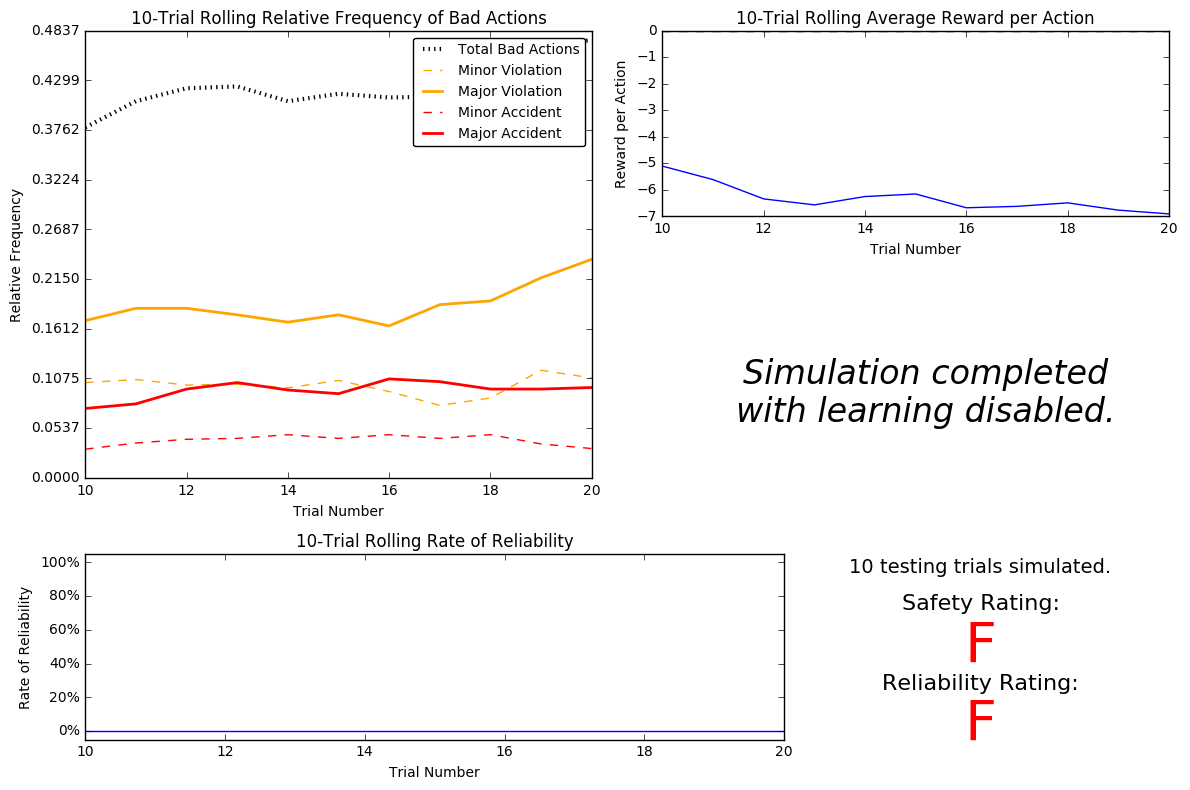

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**


**How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?**

if I enterpretate correctly the  graphics aprox 40% of the trials are bad decisions and summing minor and major accidents i would say rounds about 10% of the trials

**Given that the agent is driving randomly, does the rate of reliabilty make sense?**

i expected that ratio, basically i expected the worst reliability rate possible as here moving randonly without consider the envionment or traffic is a question of luck not having accident and get the destination. each try will be different and is not using the rewards to drive correctly or decide better. I ran two times and graphs were similar, and agent is not learning

** What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?**
according to the graph is receiving negative rewards in average per action. looking to the net rewards on the file only in 1 occasion of the tests is summing a positive net rewards. These outcomes in my opinion dont suggest anything regarding is being penalized heavily or not as the car move randomly without considering the reward


**As the number of trials increases, does the outcome of results change significantly?**
in my opinion after running two times i would say that no significantly

**Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?**

the car is not safe and not reliable, basically is a kamikaze.It cant not be safe a car which choose randomly the next action and consequently produccing accidents. Many times is not getting the obtetive so its not relliable




-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

** Which features available to the agent are most relevant for learning both safety and efficiency?**

for safety i would say that the mosts relevant are next waypoint and inputs. Aggresives deadline may force to take risk in order to be efficient. for learning we need to understand first  looking at the next waypoint and then look at the inputs, this way always looking at the next waypoint to destination and our environment without breaking the law and provoque accidents we made a safe smartcab  

**rewiever:
Are you sure that the next_waypoint is important for the safety of the agent?
In other words, would a (human) driver need a concrete destination to go to in order to be safe?***

Yes I mean that in order to learn how to be safe the agent need know the environment which is the next waypoint on the route and the imputs. I put an example, imagine that nex waypoint is forward, but is red light , then safe decision is not to move, same example but next waypoint is right, then we need consider other factors like cars coming from our left. We need eveluate next waypoint together with imputs to take safe decistions 

06.02.2017
After comment of last rewierver is fair enought and I understand the point. Agree with the statement that to be safe only need the imputs and follow the traffic rules. Sometimes i am a bit stuborn, but really is like you both comment, now i see it clear

for efficiency first and most relevant would be the deadline then the environment(imputs and nextwaypoint). i think that if we design a smartcab we need reply the behavior of a normal taxi driver. then always sacrify efficiency in favor of safety, I think that no client of this service would prefer to get the destination on time if there if the cab is risking doing violations of traffic policy



** reviewer: Are you sure that including the deadline could increase the efficiency of the agent?**

If the question is to learn eficiency i think yes. Be eficient means get the destination and getting on time in the case of a cab for that reason client pays. It is true that normal drivers dont put ususlly deadlines to get a destination. Nevertheless I am pointing out that in my design I will always sacrify efficiency in favor of safety

** Why are these features appropriate for modeling the Smartcab in the environment?**
 
as said, for modeling the smartcab important is to get the destitanion and to do it safely. From those proposed I choose to use all of them but i would try to understand if is possible to include the deadline in order to improve efficiency, as I comented before, I sacrifie efficiency on behalf of safety.

06.02.2017
I am agree as well , that including the deadline on measuring the efficiency it will increase exponentially the space of states. I only consider that is important, but as I mention before in implementation i decided not to included and I would always prefer made a driver safe better than efficent
I suppose that there are many ways to build and efficient and safe smartcab, some probably even perfect but those as this what we are discussing here, could made something really good, i am also sure that will compliacte a lot the coding and also training the agent


### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**
**JUAN 13022017**

According to that we have 2 posible values for light : red and green

we have 4 diferent values for the traffics imputs Left

we have 4 diferent values for the traffics imputs Right

we have 4 diferent values for the traffics imputs forward

we have 3 possible values for the next waypoint


total number of states 2\*4\*4\*4\*3=24=384 



**Rewiever 09022017**

As you can see above, the values of the traffic inputs are not either 'yes' or 'no', but other values, depending on where the car in the given lane is headed.
So instead of just 2 possible values, the traffic inputs (e.g. inputs['left']) can take 4 different values (3 directions + 1 for when there is no car there).

You'll have to update your answer accordingly.

NOTE

There is no need to list the states one-by-one, I only did that for illustration purposes.

It must have taken a while to list the 48 values. :)
Or did you use a software? I used Excel 

**JUAN 12022017**

According to that we have 2 posible values for light : red and green
we have 4 diferent values for the traffics imputs 
we have 3 possible values for the next waypoint
total number of states 2\*4\*3=24



**Previous Answer(no valid)**

My current state has 5 variables: light, waypoint, oncoming, left, and right. 
the posibles states for each variables are

ligth	Green	red	
waypoint	forward	right	left
oncoming	yes	no	
left	yes	no	
rigth	yes	no	

considering the posible number of spaces are 2*3*2*2*2=48, which are described below


state;light;waypoint;oncoming traffic;left traffic;right traffic

1;red;forward;yes;no;yes

2;green;left;no;yes;no

3;red;rigth;yes;no;yes

4;green;forward;no;yes;no

5;red;left;yes;no;yes

6;green;rigth;no;yes;no

7;red;forward;yes;no;yes

8;green;left;no;yes;no

9;red;rigth;yes;no;yes

10;green;forward;no;yes;no

11;red;left;yes;no;yes

12;green;rigth;no;yes;no

13;red;forward;yes;no;yes

14;green;left;no;yes;no

15;red;rigth;yes;no;yes

16;green;forward;no;yes;no

17;red;left;yes;no;yes

18;green;rigth;no;yes;no

19;red;forward;yes;no;yes

20;green;left;no;yes;no

21;red;rigth;yes;no;yes

22;green;forward;no;yes;no

23;red;left;yes;no;yes

24;green;rigth;no;yes;no

25;red;forward;yes;no;yes

26;green;left;no;yes;no

27;red;rigth;yes;no;yes

28;green;forward;no;yes;no

29;red;left;yes;no;yes

30;green;rigth;no;yes;no

31;red;forward;yes;no;yes

32;green;left;no;yes;no

33;red;rigth;yes;no;yes

34;green;forward;no;yes;no

35;red;left;yes;no;yes

36;green;rigth;no;yes;no

37;red;forward;yes;no;yes

38;green;left;no;yes;no

39;red;rigth;yes;no;yes

40;green;forward;no;yes;no

41;red;left;yes;no;yes

42;green;rigth;no;yes;no

43;red;forward;yes;no;yes

44;green;left;no;yes;no

45;red;rigth;yes;no;yes

46;green;forward;no;yes;no

47;red;left;yes;no;yes

48;green;rigth;no;yes;no


**Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?**

i think is possible to learn the policy



### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

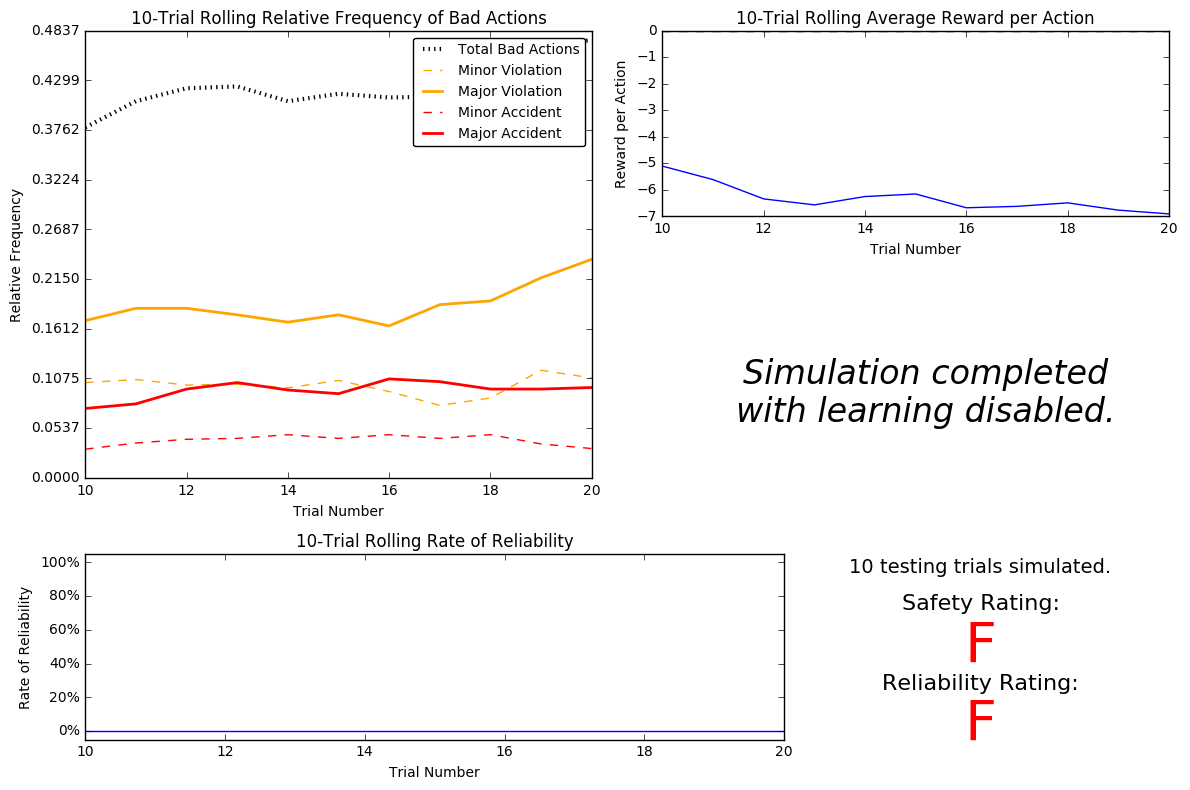

In [3]:
vs.plot_trials('sim_no-learning.csv')

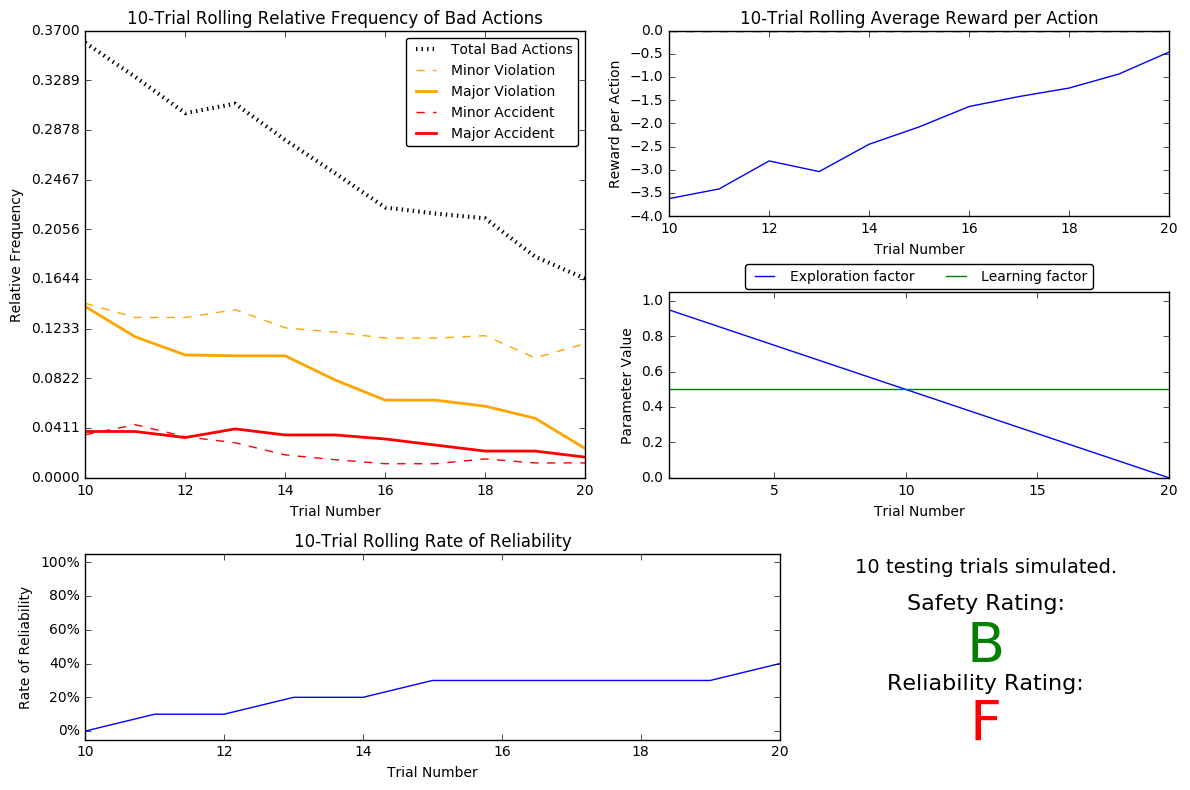

In [6]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

**Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?**

The observations are better on the default-Qlearning agent, its improve all statistics, reducing a bit number of major accidents and major violations at the end of test. The total number of bad actions is also improved, being better that than the basic agent. The agent is not improving realibity but improve safety up to B which is not bad

**Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?**

I would say aproximately 15-16 trials and having a small negative epsilon -0.05 on the decay function made sense thin amount of trials 


**Is the decaying function you implemented for ϵ ϵ (the exploration factor) accurately represented in the parameters panel?**

I implement self.epsilon -= 0.05  for this test which is what it was requested. looking at the graphic with exploration factor and learning factor we see how to drecrease from 1 to 0 , getting 0 on 20 trials which is the output of multipling -0.5 *20 , so is correctly represented

**As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?**

yes decrease all numbers for the default Q-learning agent.
yes the rewards average increase as well from -3.5 to -1 with 20 trials. on the basic agent kept stable on the range of -4


**How does the safety and reliability rating compare to the initial driving agent?**

much better in Safet now getting B and same in reliability F

Agent commits frequent minor traffic violations,
such as failing to move on a green light.

Agent fails to reach the destination on time
for at least 60% of trips.

I think that is not bad for an algorithm which is using a decay function


-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

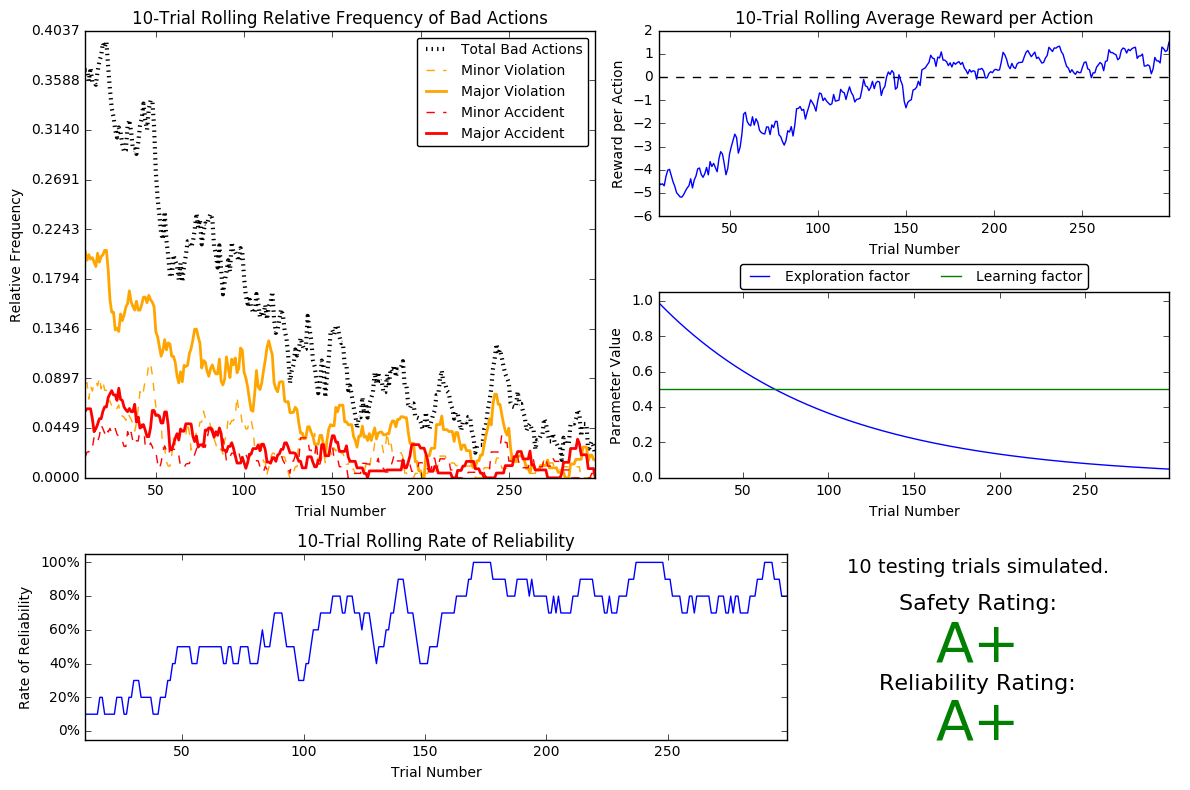

In [13]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

**What decaying function was used for epsilon (the exploration factor)?**

self.epsilon *= 0.99 then I compare with a number ramdoly generated and chose the biggest

**Approximately how many training trials were needed for your agent before begining testing?**
i would say 100 looking at the graphs

**What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?**

i used epsilon-tolerance of 0.05 and alpha of 0.5, basically i used the default tolerance and alpha .5 because i got very outcomes with .5 on the previous test

**How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?**
looking to the outcomes the improvement was very satisfactory as I am getting A+ in both paraments safety and reliability so i get in 100% of the trips get the destination safely

**Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?**
yes it learned and use it susscesfuly

**Are you satisfied with the safety and reliability ratings of the Smartcab?**
yes A+ in both

Safety/Reliability :A+
Agent commits no traffic violations,
and always chooses the correct action.
Agent reaches the destination in time
for 100% of trips.



### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.


**Answer: JUAN 14022017** 

/-------------------
| Step 0 Results
\-------------------

['forward', 'right', None, 'left']
right
Agent previous state: ('forward', ('green', 'right', 'right', 'right'))

Agent drove right instead of forward. (rewarded 1.29)

95% of time remaining to reach destination.

('forward', ('green', 'right', 'right', 'right'))
 -- forward : 0.00
 -- right : 0.00
 -- None : 0.00
 -- left : 0.00
 
 here the agent take right. all the options are weithed with 0 and take a random option
 
 first line is the Q-max options(a print of my actions_r, second , in this case right is what the algorithm randomly choose), as all of them have 0 , it take randonly right. the agent is implmenting correctly he policy
 
 
 
 -------------------------------------------------
 
 
[None]
None
Agent previous state: ('left', ('red', None, None, 'left'))

Agent properly idled at a red light. (rewarded 1.87)

90% of time remaining to reach destination.

('left', ('red', None, None, 'left'))
 -- forward : -9.55
 -- right : 0.36
 -- None : 1.87
 -- left : -9.82
 
 here the agent take the Q-max. on my list actions_r only one None, so it cant other apart of Bone.Thenmatch with policy which is 1.87, max reward among all states
 
 ---------------------------------------------------------------------------
 ['forward']
forward
Agent previous state: ('forward', ('green', None, None, 'left'))

Agent followed the waypoint forward. (rewarded 2.32)

77% of time remaining to reach destination.
 
('forward', ('green', None, None, 'left'))
 -- forward : 2.32
 -- right : 0.57
 -- None : -3.53
 -- left : 0.35

agent take the q-max option. is following the policy





**Answer:** 


('right', ('green', None, 'right', 'left'))
 -- forward : 0.00
 -- right : 0.98
 -- None : -2.19
 -- left : 0.00

('left', ('green', 'left', None, None))
 -- forward : 0.38
 -- right : 0.51
 -- None : 0.04
 -- left : 2.38
 
 ('left', ('green', 'forward', 'left', 'forward'))
 -- forward : 0.80
 -- right : 0.00
 -- None : 0.00
 -- left : -9.60
 

example 1
car move to the right with green light and choosing the maximun reward wich is 0.98

example 2
here car move to left with green light and choose the maximun regard wihch is left 2.38 and that was the movement it was intended to do
 
example 3 
In this example the car doesnt take the highest Q-value which is forward and take left which have a negative value of -9.60
 

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

I think that the use of future rewards is not suitable here because would mean to take not safe decistion in intermediry steps and take risk to the life of passengers. Take and action which negative reward with the idea to have a future positive rewards would cause to made infractions or accidents , which will reduce the percentage of safety

08022017
Now I see the point. after all test I did yesterday I understood that asyou mention the car does not remember previous route and only see the current intersection 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.